# BigDL object detection demo

This notebook shows how to use pretrained BigDL model in customized dataset to detect Messi.

In [1]:
from bigdl.util.common import *
from bigdl.transform.vision.image import *
from IPython.display import Image, display
%matplotlib inline
from bigdl.nn.layer import Model
import os
from moviepy.editor import *
from IPython.display import Image
from IPython.display import display
from bigdl.zoo.segmentation import *
import cv2

JavaCreator.add_creator_class("com.intel.analytics.zoo.pipeline.pythonapi.PythonSegmentation")
init_engine()

Download [model](https://s3-ap-southeast-1.amazonaws.com/bigdl-models/segmentation/mask-rcnn.model)

In [2]:
## load and quantize model

model = Model.loadModel("mask-rcnn.model").quantize()
print 'load model done'

load model done


In [3]:
# Define Predictor Configure
preprocess = Pipeline([AspectScale(800, scale_multiple_of=1, max_size=1024, use_scale_factor=False, min_scale=1.0),
                       FixExpand(1024, 1024),
                       ChannelNormalize(103.9, 116.8, 123.7),
                       MatToTensor(),
                       ImageMeta(81),
                       ImageFrameToSample(['imageTensor', 'ImageMeta'])])
postprocess = UnmodeDetection()

label_map = read_coco_label_map()
visualizer = Visualizer(label_map)

creating: createAspectScale
creating: createFixExpand
creating: createChannelNormalize
creating: createMatToTensor
creating: createImageMeta
creating: createImageFrameToSample
creating: createPipeline
creating: createUnmodeDetection
creating: createVisualizer


In [4]:
folder = "image"
image_frame = ImageFrame.read(folder, sc, 1).transform(preprocess)
output = model.predict_image(image_frame, batch_per_partition=1, share_buffer=False).transform(postprocess)

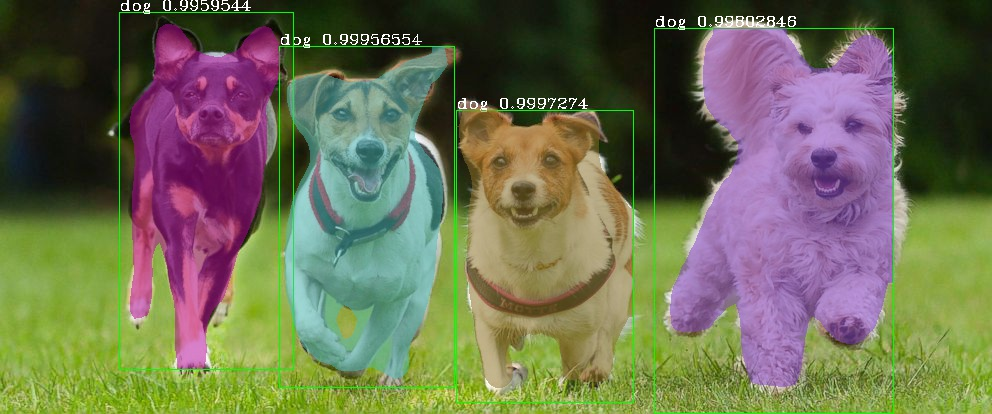

In [5]:
# visualize detections
visualized = visualizer(output).get_image(to_chw=False).collect()
for img_id in range(len(visualized)):
    cv2.imwrite('/tmp/tmp' + str(img_id) + '.jpg', visualized[img_id])
    display(Image(filename='/tmp/tmp' + str(img_id) + '.jpg'))